# MI 2 SoSe22: Exercise sheet 1

For more information, you can also check the solutions of all exercise sheets from another group of students of MI 2 from 2016 [in this repository](https://github.com/jrieke/machine-intelligence-2).

For this exercise sheet in particular, [here](https://www.askpython.com/python/examples/principal-component-analysis) there is a nice tutorial on PCA and its implementation in Python.

### Exercise H1.1: PCA: 2-dimensional Toy Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### a)

In [2]:
def center(x):
    '''Returns centered data'''
    x_centered = x - np.mean(x, axis = 0)
    return x_centered

<IPython.core.display.Javascript object>


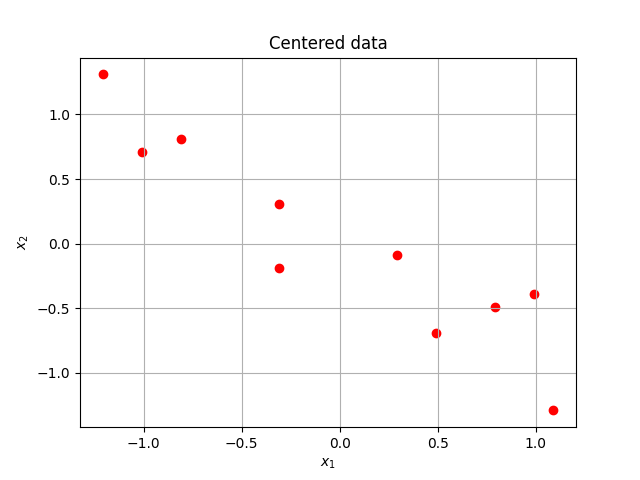

In [9]:
# Loads and center data
data = np.genfromtxt(fname='pca-data-2d.txt', delimiter='   ', dtype=np.float, skip_header = 0)
data_centered = center(data).T

# Scatter plot for centered data
plt.scatter(data_centered[0], data_centered[1], marker = 'o', color = 'r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Centered data")
plt.grid()
plt.show()

##### b)

<IPython.core.display.Javascript object>


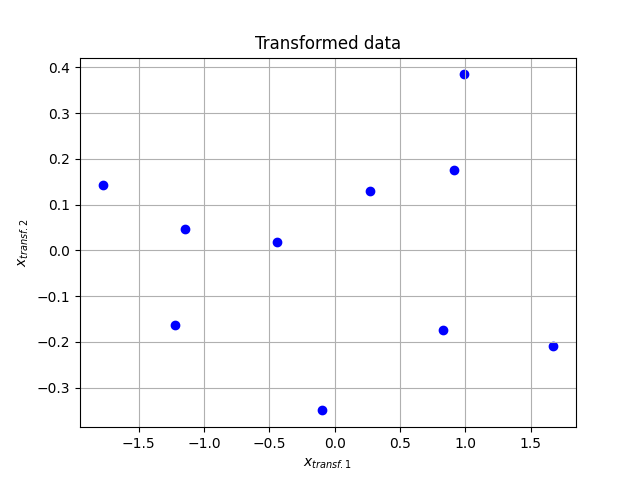

In [10]:
# Covariance and eigendecomposition
covariance = np.cov(data_centered)
eig_value, eig_vector = np.linalg.eig(covariance)

# Sorts eigenvalues and eigenvectors
sorted_index = np.argsort(eig_value)[::-1] # From highest to lowest
eig_value_sorted = eig_value[sorted_index]
eig_vector_sorted = eig_vector[:, sorted_index]

# Transforms centered data to one with diagonal covariance
data_transformed = np.dot(data_centered.T, eig_vector_sorted)

# Plots
plt.scatter(data_transformed[:,0], data_transformed[:, 1], marker = 'o', color = 'b')
plt.xlabel('$x_{transf. 1}$')
plt.ylabel('$x_{transf. 2}$')
plt.title("Transformed data")
plt.grid()
plt.show()

##### c) 

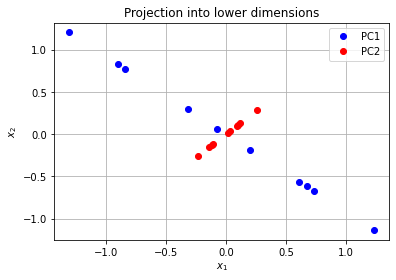

In [6]:
# PCs and projections of the data
e1 = eig_vector_sorted[:,0]
e2 = eig_vector_sorted[:,1]
a1 = np.dot(e1, data_centered)
a2 = np.dot(e2, data_centered)

# Plots
plt.plot( a1*e1[0], a1*e1[1], 'bo', label = "PC1")
plt.plot( a2*e2[0], a2*e2[1], 'ro', label = "PC2")
plt.xlabel('$x_{1}$')
plt.ylabel('$x_{2}$')
plt.title("Projection into lower dimensions")
plt.grid()
plt.legend()
plt.show()

### Exercise H1.2: PCA: 3-dimensional Toy Data

For the 3d plots it can be helpful to interact with the images. To do so we can activate the interaction mode by using `%matplotlib notebook`. To turn it off, we use `%matplotlib inline`.

##### a)

<IPython.core.display.Javascript object>


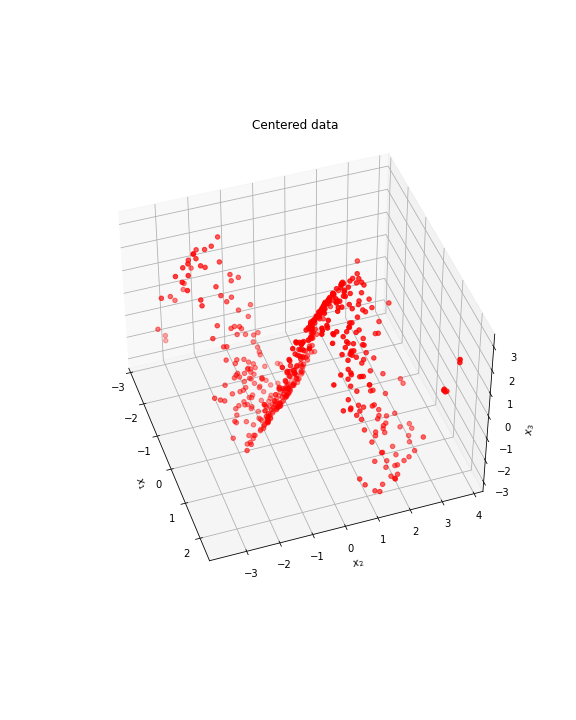

In [18]:
# Loads and center data
data3d = np.genfromtxt(fname='pca-data-3d.txt', delimiter=',', dtype=np.float, skip_header = 1)
data3d_centered = center(data3d).T

# Uncomment line below to provide interactivity 
%matplotlib notebook 


# 3D plots
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data3d_centered[0], data3d_centered[1], data3d_centered[2], marker = 'o', color = 'r')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_title("Centered data")
plt.show()

##### b)

<IPython.core.display.Javascript object>


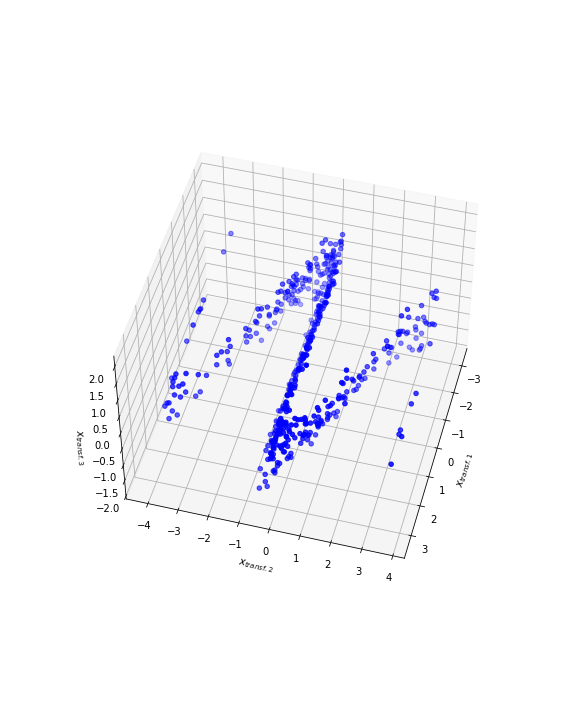

In [19]:
# Covariance and eigendecomposition
covariance3d = np.cov(data3d_centered)
eig_value3d, eig_vector3d = np.linalg.eig(covariance3d)

# Sorts eigenvalues and eigenvectors
sorted_index3d = np.argsort(eig_value3d)[::-1] # from highest to lowest
eig_value3d_sorted = eig_value3d[sorted_index]
eig_vector3d_sorted = eig_vector3d[:, sorted_index3d]

# Transforms centered data to one with diagonal covariance
data3d_transformed = np.dot(data3d_centered.T, eig_vector3d_sorted)

# Plots
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data3d_transformed[:,0], data3d_transformed[:, 1], data3d_transformed[:, 2], marker = 'o', color = 'b')
ax.set_xlabel('$x_{transf. 1}$')
ax.set_ylabel('$x_{transf. 2}$')
ax.set_zlabel('$x_{transf. 3}$')
plt.grid()
plt.show()

##### c)

<IPython.core.display.Javascript object>


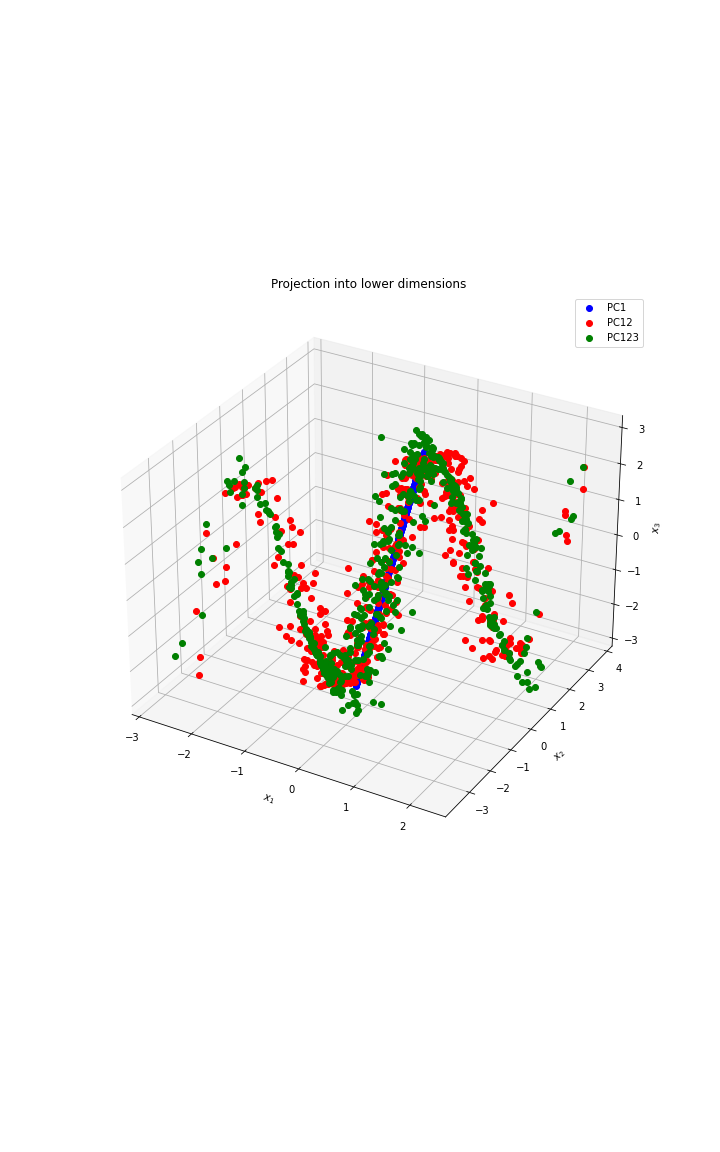

In [22]:
# PCs and projections of the data
e1 = eig_vector3d_sorted[:,0]
e2 = eig_vector3d_sorted[:,1]
e3 = eig_vector3d_sorted[:,2]
a1 = np.dot(e1, data3d_centered)
a2 = np.dot(e2, data3d_centered)
a3 = np.dot(e3, data3d_centered)

# Plots
fig = plt.figure(figsize=(10,16))
ax = fig.add_subplot(projection='3d')
ax.plot( a1*e1[0], a1*e1[1], a1*e1[2], 'bo', label = "PC1")
ax.plot( a1*e1[0] + a2*e2[0], a1*e1[1] + a2*e2[1], a1*e1[2] + a2*e2[2], 'ro', label = "PC12")
ax.plot( a1*e1[0] + a2*e2[0] + a3*e3[0], a1*e1[1] + a2*e2[1] + a3*e3[1], a1*e1[2] + a2*e2[2] + a3*e3[2], 'go', label = "PC123") # This is the same as plotting the entire data3d_c data
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{3}$')
ax.set_title("Projection into lower dimensions")
plt.grid()
plt.legend()
plt.show()